In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def quat_to_euler(quat):
    w, x, y, z = quat

    phi = np.arctan2(2 * (y * z + w * x), 1 - 2 * (x**2 + y**2))
    theta = -np.arcsin(2 * (x * z - w * y))
    psi = np.arctan2(2 * (w * z + x * y), 1 - 2 * (y**2 + z**2))
    return np.array([phi, theta, psi])

pose_data = pd.read_csv('qp_test2/qp-test/navigation/pose.csv')
guidance_data = pd.read_csv('qp_test2/qp-test/guidance/reference/pose.csv')
# print(pose_data.head())
print(guidance_data.head())


                            time      north        east   heading
0  2025/04/05 15:58:40.428240701 -238.48962 -300.929519 -0.016596
1  2025/04/05 15:58:40.530023089 -238.47862 -300.928480 -0.016510
2  2025/04/05 15:58:40.628805539 -238.46712 -300.927417 -0.016421
3  2025/04/05 15:58:40.729264781 -238.45512 -300.926331 -0.016331
4  2025/04/05 15:58:40.829183829 -238.44262 -300.925224 -0.016239


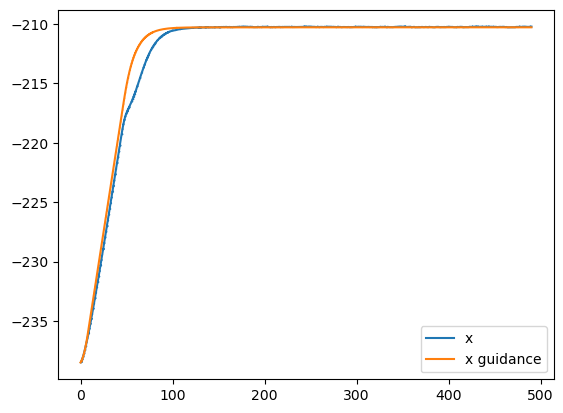

In [9]:
pose_x = pose_data['pose_position_x']
pose_time = pd.to_datetime(pose_data['time'])
base_time = pose_time.iloc[0]
pose_time = (pose_time - base_time).dt.total_seconds()
guidance_x = guidance_data['north']
guidance_time = pd.to_datetime(guidance_data['time'])
guidance_time = (guidance_time - base_time).dt.total_seconds()

plt.figure()
plt.plot(pose_time.to_numpy(), pose_x.to_numpy(), label='x')
plt.plot(guidance_time.to_numpy(), guidance_x.to_numpy(), label='x guidance')
# plt.xlim([300, 325])
plt.legend()
plt.show()

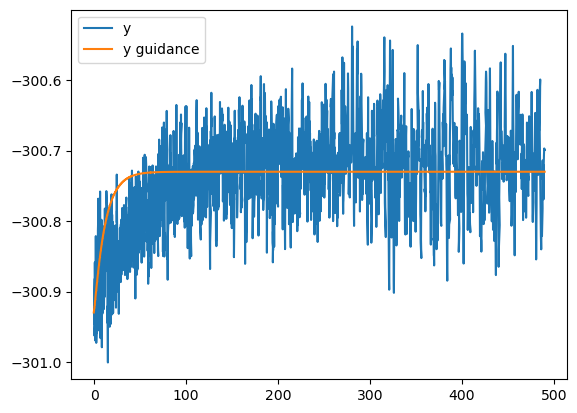

In [10]:
pose_y = pose_data['pose_position_y']
guidance_y = guidance_data['east']

plt.figure()
plt.plot(pose_time.to_numpy(), pose_y.to_numpy(), label='y')
plt.plot(guidance_time.to_numpy(), guidance_y.to_numpy(), label='y guidance')
# plt.xlim([300, 325])
plt.legend()
plt.show()

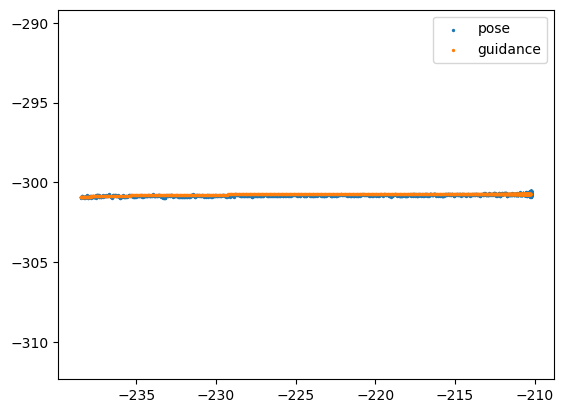

In [11]:
plt.figure()
plt.scatter(pose_x.to_numpy(), pose_y.to_numpy(), label='pose', s=2)
plt.scatter(guidance_x.to_numpy(), guidance_y.to_numpy(), label='guidance', s=2)
plt.legend()
plt.axis('equal')
plt.show()

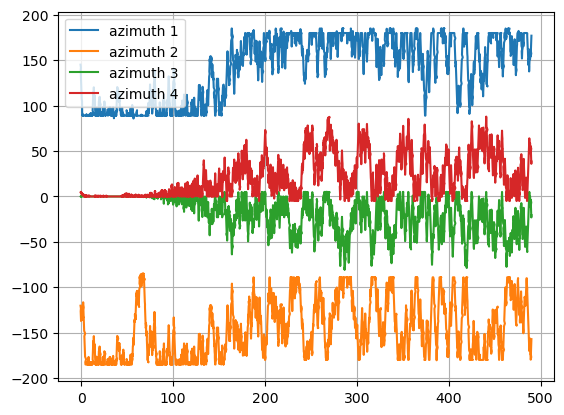

In [12]:
azimuth_1_data = pd.read_csv('qp_test2/qp-test/actuators/actuator_1/azimuth_angle.csv')
azimuth_1_time = pd.to_datetime(azimuth_1_data['time'])
azimuth_1_time = (azimuth_1_time - base_time).dt.total_seconds()
azimuth_2_data = pd.read_csv('qp_test2/qp-test/actuators/actuator_2/azimuth_angle.csv')
azimuth_2_time = pd.to_datetime(azimuth_2_data['time'])
azimuth_2_time = (azimuth_2_time - base_time).dt.total_seconds()
azimuth_3_data = pd.read_csv('qp_test2/qp-test/actuators/actuator_3/azimuth_angle.csv')
azimuth_3_time = pd.to_datetime(azimuth_3_data['time'])
azimuth_3_time = (azimuth_3_time - base_time).dt.total_seconds()
azimuth_4_data = pd.read_csv('qp_test2/qp-test/actuators/actuator_4/azimuth_angle.csv')
azimuth_4_time = pd.to_datetime(azimuth_4_data['time'])
azimuth_4_time = (azimuth_4_time - base_time).dt.total_seconds()

actuator_1_ref = pd.read_csv('qp_test2/qp-test/actuator_ref_1.csv')
actuator_1_ref_time = pd.to_datetime(actuator_1_ref['time'])
actuator_1_ref_time = (actuator_1_ref_time - base_time).dt.total_seconds()
actuator_2_ref = pd.read_csv('qp_test2/qp-test/actuator_ref_2.csv')
actuator_2_ref_time = pd.to_datetime(actuator_2_ref['time'])
actuator_2_ref_time = (actuator_2_ref_time - base_time).dt.total_seconds()
actuator_3_ref = pd.read_csv('qp_test2/qp-test/actuator_ref_3.csv')
actuator_3_ref_time = pd.to_datetime(actuator_3_ref['time'])
actuator_3_ref_time = (actuator_3_ref_time - base_time).dt.total_seconds()
actuator_4_ref = pd.read_csv('qp_test2/qp-test/actuator_ref_4.csv')
actuator_4_ref_time = pd.to_datetime(actuator_4_ref['time'])
actuator_4_ref_time = (actuator_4_ref_time - base_time).dt.total_seconds()

plt.figure()
plt.plot(azimuth_1_time.to_numpy(), azimuth_1_data['data'].to_numpy(), label='azimuth 1')
# plt.plot(actuator_1_ref_time.to_numpy(), actuator_1_ref['angle_reference'].to_numpy(), label='azimuth 1 ref')
plt.plot(azimuth_2_time.to_numpy(), azimuth_2_data['data'].to_numpy(), label='azimuth 2')
# plt.plot(actuator_2_ref_time.to_numpy(), actuator_2_ref['angle_reference'].to_numpy(), label='azimuth 2 ref')
plt.plot(azimuth_3_time.to_numpy(), azimuth_3_data['data'].to_numpy(), label='azimuth 3')
# plt.plot(actuator_3_ref_time.to_numpy(), actuator_3_ref['angle_reference'].to_numpy(), label='azimuth 3 ref')
plt.plot(azimuth_4_time.to_numpy(), azimuth_4_data['data'].to_numpy(), label='azimuth 4')
# plt.plot(actuator_4_ref_time.to_numpy(), actuator_4_ref['angle_reference'].to_numpy(), label='azimuth 4 ref')
plt.legend()
plt.grid()
plt.show()

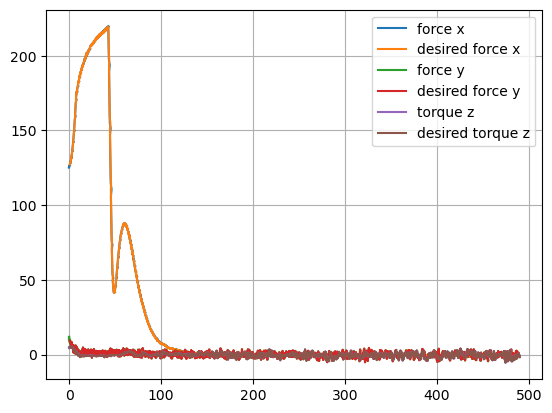

In [6]:
control_action_data = pd.read_csv('qp_test2/qp-test/dynamic_positioning/control_action.csv')
control_action_time = pd.to_datetime(control_action_data['time'])
control_action_time = (control_action_time - base_time).dt.total_seconds()
force_x = control_action_data['force_x']
force_y = control_action_data['force_y']
torque_z = control_action_data['torque_z']

desired_control_action_data = pd.read_csv('qp_test2/qp-test/tau_actual.csv')
desired_control_action_time = pd.to_datetime(desired_control_action_data['time'])
desired_control_action_time = (desired_control_action_time - base_time).dt.total_seconds()
desired_force_x = desired_control_action_data['wrench_force_x']
desired_force_y = desired_control_action_data['wrench_force_y']
desired_torque_z = desired_control_action_data['wrench_torque_z']

plt.figure()
plt.plot(control_action_time.to_numpy(), force_x.to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_force_x.to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), force_y.to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_force_y.to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), torque_z.to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_torque_z.to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

# Performance metrics

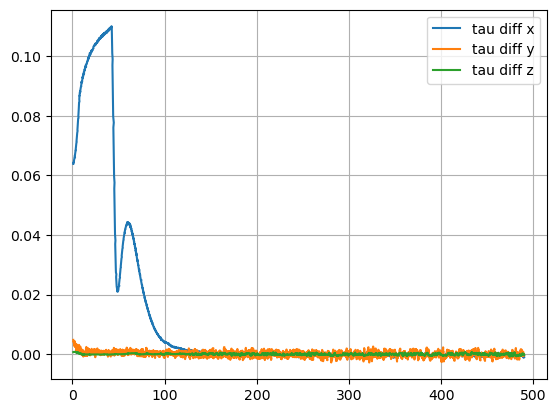

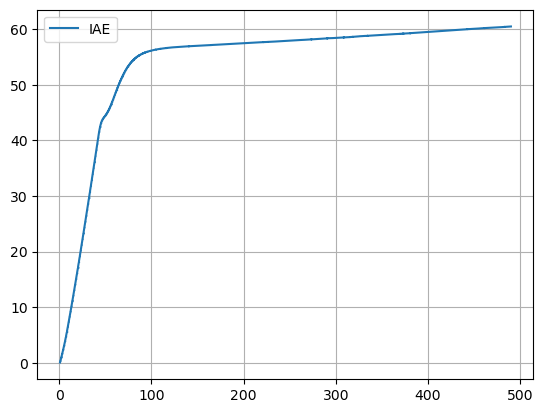

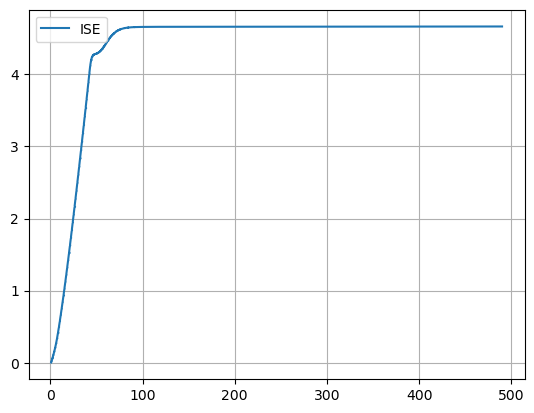

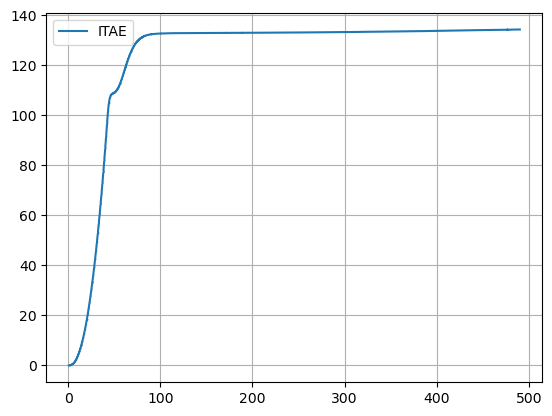

In [7]:
tau_diff = pd.read_csv('qp_test2/qp-test/tau_diff.csv')
tau_diff_time = pd.to_datetime(tau_diff['time'])
tau_diff_time = (tau_diff_time - base_time).dt.total_seconds()
tau_diff_x = tau_diff['wrench_force_x']
tau_diff_y = tau_diff['wrench_force_y']
tau_diff_z = tau_diff['wrench_torque_z']

plt.figure()
plt.plot(tau_diff_time.to_numpy(), tau_diff_x.to_numpy(), label='tau diff x')
plt.plot(tau_diff_time.to_numpy(), tau_diff_y.to_numpy(), label='tau diff y')
plt.plot(tau_diff_time.to_numpy(), tau_diff_z.to_numpy(), label='tau diff z')
plt.legend()
plt.grid()
plt.show()

IAE = np.zeros(len(tau_diff_time))
iae_sum = 0
for i in range(len(tau_diff_time)):
    iae_sum += np.sqrt(tau_diff_x[i]**2 + tau_diff_y[i]**2 + tau_diff_z[i]**2)
    IAE[i] = iae_sum
plt.figure()
plt.plot(tau_diff_time.to_numpy(), IAE, label='IAE')
plt.legend()
plt.grid()
plt.show()

ISE = np.zeros(len(tau_diff_time))
ise_sum = 0
for i in range(len(tau_diff_time)):
    ise_sum += (tau_diff_x[i]**2 + tau_diff_y[i]**2 + tau_diff_z[i]**2)
    ISE[i] = ise_sum
plt.figure()
plt.plot(tau_diff_time.to_numpy(), ISE, label='ISE')
plt.legend()
plt.grid()
plt.show()

ITAE = np.zeros(len(tau_diff_time))
itae_sum = 0
for i in range(len(tau_diff_time)):
    itae_sum += (tau_diff_x[i]**2 + tau_diff_y[i]**2 + tau_diff_z[i]**2) * tau_diff_time[i]
    ITAE[i] = itae_sum
plt.figure()
plt.plot(tau_diff_time.to_numpy(), ITAE, label='ITAE')
plt.legend()
plt.grid()
plt.show()